# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

table2 = pd.read_csv("airbnb_hw.csv") #load the file
table2["Price"]=table2['Price'].astype(str).replace(",", "", regex=True)
print(table2["Price"].unique())
table2["Price"]=pd.to_numeric(table2["Price"], errors = "coerce")
table2['Price_N'] = table2['Price'].isnull()
print(table2["Price_N"].sum())

0
['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' '

There are no missing values when the commas are taken out of numbers above 999.


In [ ]:
table3 = pd.read_csv("mn_police_use_of_force.csv") #get dataset
table3['sub_injury_missing'] = table3['subject_injury'].isnull() #make a new column on how often a misreport occurs
table3["subject_injury"].fillna("No_Report", inplace = True) #changing the data from nothing to a string variable
print(table3["sub_injury_missing"].value_counts(normalize=True)) #give the counts of misreports
pd.crosstab(table3['force_type'], table3['subject_injury'], normalize = True) #cross tabulate the two variables to look for correlation

sub_injury_missing
True     0.761934
False    0.238066
Name: proportion, dtype: float64


<ipython-input-33-01ebc35df1eb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  table3["subject_injury"].fillna("No_Report", inplace = True)


subject_injury,No,No_Report,Yes
force_type,,,
Baton,0.000000,0.000155,0.000155
Bodily Force,0.084565,0.545532,0.099497
Chemical Irritant,0.010135,0.109942,0.003172
Firearm,0.000155,0.000000,0.000000
Gun Point Display,0.002553,0.002089,0.003404
Improvised Weapon,0.002631,0.005725,0.003095
Less Lethal,0.000000,0.006731,0.000000
Less Lethal Projectile,0.000077,0.000000,0.000155
Maximal Restraint Technique,0.000000,0.013153,0.000000


The proportion of values that are missing is 0.76. This is concerning because this means that a majority of police interactions in this data set have unreported statuses on the possibe injury of a subject. It is possible the the proportion of subjects who are injured are being misreported and police are using excessive force. When crosstabluated with the type of force used, there is a clear trend as to when the misreporting occurs. For over half of the interactions using bodily force, there is no report for subject injury. Also when a chemical irritant is used, there is no report for about one tenth of the time. One good thing from this data set is that there is never a misreport when a firearm is used.

In [ ]:
import pandas as pd
import numpy as np
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)
print(df["WhetherDefendantWasReleasedPretrial"].unique()) #assume that 0 means not released, and 1 means released
#assume that 9 means missing data

[9 0 1]


In [ ]:
df["WhetherDefendantWasReleasedPretrial"]=df["WhetherDefendantWasReleasedPretrial"].replace(9, np.nan)
#replace 9's
print(df["WhetherDefendantWasReleasedPretrial"].unique())

[nan  0.  1.]


In [ ]:
df["ImposedSentenceAllChargeInContactEvent"]=pd.to_numeric(df['ImposedSentenceAllChargeInContactEvent'], errors="coerce")
#turn everything to a numeric
df['ImposedSentenceAllChargeInContactEvent']=df['ImposedSentenceAllChargeInContactEvent'].fillna(0).astype(int) #convert to ints
print(df['ImposedSentenceAllChargeInContactEvent'].unique())


[   0   60   12   36    6   24    5  120   72   11    2   84  108  300
  240  180    4   96   54   44  115  132   48  258   34   76  111    9
    3    1   35  106    8   18  480   32   93  234  732   21    7  600
   43  179   52   30   20  192  702   14   55   53  114   68   46  102
   65  200   57  117   81   22 1980   56   10   47 1500   40  284  118
   42  162  156  105   51  246   29   75  324  360   59   66  660   78
  228   62   86  168   23   33  720  348 1200   27   49   87  420   63
   79   17  238  126   45  158  216  227  445   70  516  177 1752   90
 1080  141  230   31 2208   69   26  140  131  344  219  101   71   58
   67   91  155   92  207   74  518   28  237  404  551   39   15  124
  176   19  482  129   88  128  136   50  363  288  250  107  444  205
   38  264  276  173  222  144  294  336  431  450   73   99  127  202
   89  242 1029  194  399  198  148   13  104  212  183  252  540  133
  456  103  576  492   61   16  138   95   77 1011  188  432   98  112
  354 

I chose to make the entire column integers because the other sentence column was only integers.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

table = pd.read_excel("GSAF5.xls") #load the file

blank = table.isna().sum() #checking the sum of blank values
print(table.shape) #getting the dimensions
print(blank)
#if any of number of blanks in a column is equal to the number of rows, then all data in that column in blank
names = table.columns
#get rid of the last two columns that do not contain any data
names = names[:len(names)-2]
table = table[names]
print(table.shape)



(6992, 23)
Date                 0
Year                 2
Type                18
Country             50
State              482
Location           565
Activity           585
Name               219
Sex                579
Age               2994
Injury              35
Fatal Y/N          561
Time              3526
Species           3132
Source              19
pdf                193
href formula       198
href               196
Case Number        194
Case Number.1      195
original order     193
Unnamed: 21       6991
Unnamed: 22       6990
dtype: int64
(6992, 21)


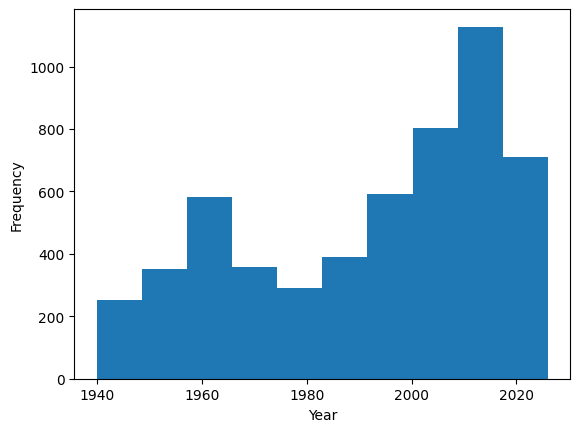

In [ ]:

#get rid of any rows where Year is blank and cast to an int
table.dropna(subset = ["Year"], inplace = True)
table["Year"] = table["Year"].astype("int")
#There are many years included, mainly starting in the 1800's and ending at present day. There are some that have an unknown year (0) or are extremely old
table["Year"].unique()
#get rid of all rows where the date is before 1940
table = table[table["Year"]>=1940]
#create a plot
plt.hist(table["Year"])
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

The histogram for frequency of shark attacks based on year shows that shark attacks have generally increased throughout the decades. There have been some dips, such as in the 80's. There is also a dip for the 2020's, but that is likely because the decade is only halfway through

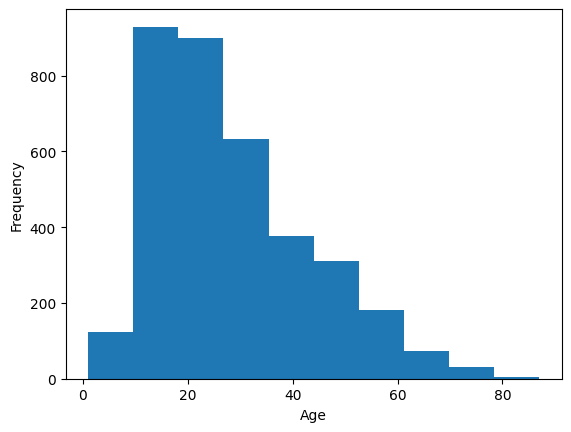

In [ ]:

table["Age"].unique()
#change the age column to a numeric, this will turn any strings such as "28" into numerics
table["Age"] = pd.to_numeric(table["Age"], errors = "coerce")
#drop null values
table.dropna(subset = ["Age"], inplace = True)
#cast back to int
table["Age"] = table["Age"].astype("int")
plt.hist(table["Age"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [ ]:

table.dropna(subset = ["Sex"], inplace = True)
table["Sex"] = table["Sex"].str.strip()
table = table[table['Sex'].isin(['M', 'F'])]
print(table["Sex"].value_counts(normalize = True))

Sex
M    0.845434
F    0.154566
Name: proportion, dtype: float64




```
The proportion of males in this dataset is 0.845
```



In [ ]:
#Provoked and Unprovoked and Unknown

#table["Type"].unique()
table["Type"] = table["Type"].replace(["Invalid", "Watercraft", "Questionable", "Sea Disaster", "Sea Disaster", "?", "Under investigation"], "Unknown")
table.dropna(subset = ["Type"], inplace = True)
table["Type"].unique()
print(table["Type"].value_counts(normalize = True))
print(table.shape)

Type
Unprovoked    0.834518
Unknown       0.084163
Provoked      0.081319
Name: proportion, dtype: float64
(3517, 21)


The proportion of attacks that are unprovoked is 0.834

In [ ]:

table["Fatal Y/N"] = table["Fatal Y/N"].replace(["F", "M", 2017, "UNKNOWN", " N"], "Unknown")
table.dropna(subset = ["Fatal Y/N"], inplace = True)
print(table["Fatal Y/N"].unique())


['N' 'Y' 'Unknown']


In [ ]:
pd.crosstab(table['Type'], table['Sex'], normalize = True)

Sex,F,M
Type,,
Provoked,0.006323,0.079494
Unknown,0.004216,0.028305
Unprovoked,0.142728,0.738934




```
Sharks are more likely to attack Men (0.14) unprokoved rather than Women (0.74) due to the large difference in proportions.
```



In [ ]:
pd.crosstab(table['Type'], table['Fatal Y/N'], normalize = True)

Fatal Y/N,N,Unknown,Y
Type,,,
Provoked,0.082806,0.000903,0.002108
Unknown,0.023788,0.000602,0.008130
Unprovoked,0.733815,0.004216,0.143631


When the attack is unprovoked, it is more likely to not be fatal (0.73) rather than fatal (0.14). When the attack is provoked, it is more likely to not be fatal (0.083) rather than fatal (0.0021).

In [ ]:
pd.crosstab(table['Sex'], table['Fatal Y/N'], normalize = True)

Fatal Y/N,N,Unknown,Y
Sex,,,
F,0.130684,0.000602,0.021981
M,0.709726,0.005119,0.131888


When the attack is on a male, it is more likely to not be fatal (0.71) rather than fatal (0.13). When the attack is on a female, it is more likely to not be fatal (0.13) rather than fatal (0.021).

I generally think sharks interesting animals. Like most animals, I think there would be less problems/fear around them if we left them alone most of the time instead of bothering them in their natural habitat.


In [ ]:
print(table ["Species "])


table["SpeciesCounts"]=table["Species "].str.contains("white", case=False)
print(table["SpeciesCounts"].value_counts(normalize=True))

0                                   Not stated
1                                Bronze whaler
2                                   Not stated
3               Reportedly Tiger or Bull shark
4       Great White Shart estimated 4.8m 16 ft
                         ...                  
5448                                       NaN
5449                           "a small shark"
5450                           3 m [10'] shark
5451                                       NaN
5452                          2.4 m [8'] shark
Name: Species , Length: 3321, dtype: object
SpeciesCounts
False    0.779572
True     0.220428
Name: proportion, dtype: float64


The proportion of attacks dones by white sharks are 0.22

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. The paper is about the importance of having efficient methods for data cleaning. This is often an overlooked part of research, but having clear methods to clean data into a "tidy" format (rows and columns) is extremely important. The paper focuses what tidy data is (the format of rows and columns), and how to get there. The main idea of the paper is the importance of standardizing data cleaning by putting data first into a tidy format.
2. The purpose of the tidy data standard is to help with the inital cleaning and analysis of data. The tidy data standard was also designed to help with usage of data cleaning tools in conjunction with one another. For example, somtimes one cleaning package will output data in a type that is not compatible with a different cleaning package. The standard was designed to mitigate that.
3. The first sentence means that every data set will come needing to be cleaned, but the cleaning for every dataset is individual and unique. The second sentence means that defining the relationship between variables can be hard if there is not context.
4. Values are strings or numbers in the data table. A variable is an attribute that holds all of the values specifc to that variable. An observation is a collection of values for one unit across all of the possible variables/attributes.
5. Tidy data is defined by having three qualites: every variable forms a column, every observation forms a row, and all of the observational units form a table
6. The five most common problems are column names being values instead of variables, multiple variables being in the same column, variables being in rows and columns instead of just columns, different types of observational units in the same table, and the same observational unit being stored in multiple tables. The data in table 4 are messy because the columns and rows are all values instead of observations and variables. Since the three variables in this experiment are religion, income, and frequency, each should have its own column. Instead, the current columns in the data table are the values of the income variables, and the current rows are the values of the religion variable. This will make further analysis on the data harder in the future. The way to remedy this is to melt the dataset. This essentially means that columns will be turning into rows. The end result of this will be a dataset with many rows, each representing an observational unit. In this case, each column will be a single variable. Overall, melting a dataset is sorting out each data point into its respective column and variable instead of the combination form that it may initally be in. Melting helps in later data processing.
7. Specifically, table 11 is messy because there are two different types in the same table. This means that the table should be broke up into two different tables. We know this because there are many columns which are actually just values. These are all of the columns representing days of the month, which are actually values of the day variable. Table 12 is tidy and molten because the table was broken up into two separate tables, each holding different types of information. It is also tidy and molten because each row is an observation and each column is a variable, not a combination of the two.
8.The chicken and egg situation arises from the fact that tidy data tools are dependent on the data collected and vice versa. Basically to advance in one field, an advancement in the other must be made, so progress is slow. Wickham  hopes that other fields, such as human factors, can collaborate to work on tidy data tools and stanards. He also hopes to use the tools from other fields as well.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?